In [1]:
import sys
sys.path.append('../CONFIG')
import config as cf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### Reading input data

In [2]:
df = pd.read_csv(cf.path, index_col=False)

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Checking Data Integrity

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Visulizing histograms of columns

/home/lionel/projects/Heart_Failure_Prediction/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

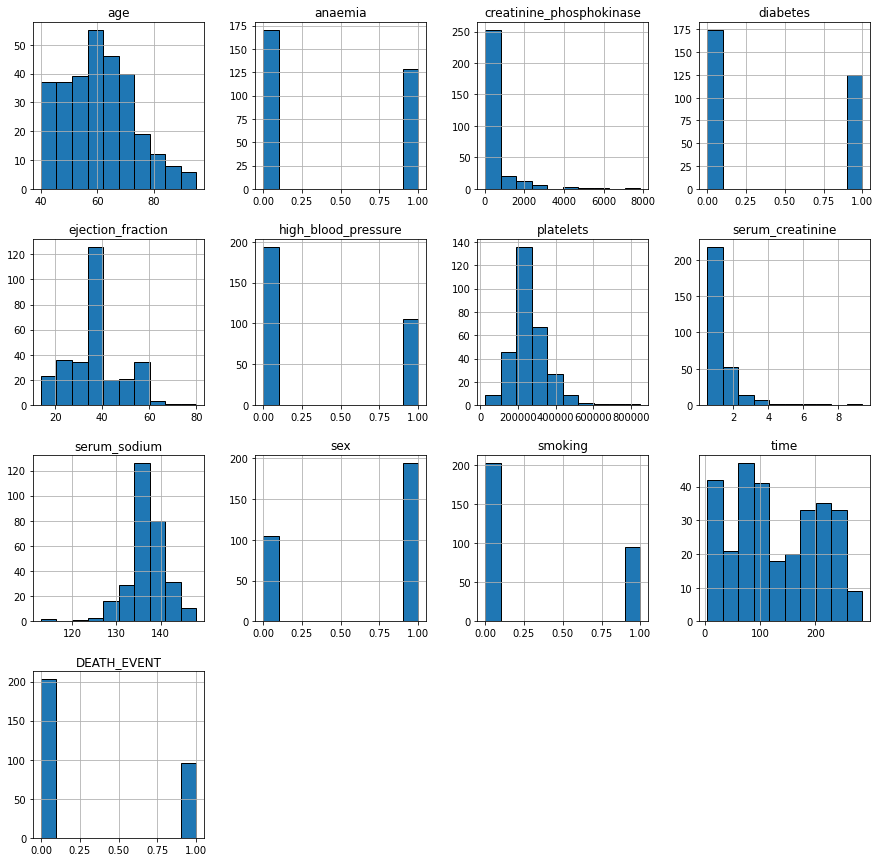

In [8]:
df.hist(figsize=(15,15),edgecolor='black')

#### Finding correlations between columns

In [9]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.10,0.06,0.09,-0.05,0.16,-0.05,0.07,0.02,-0.22,0.25
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.04,-0.04,0.05,0.04,-0.09,-0.11,-0.14,0.07
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.02,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.10,-0.01,-0.01,1.00,-0.00,-0.01,0.09,-0.05,-0.09,-0.16,-0.15,0.03,-0.00
ejection_fraction,0.06,0.03,-0.04,-0.00,1.00,0.02,0.07,-0.01,0.18,-0.15,-0.07,0.04,-0.27
high_blood_pressure,0.09,0.04,-0.07,-0.01,0.02,1.00,0.05,-0.00,0.04,-0.10,-0.06,-0.20,0.08
platelets,-0.05,-0.04,0.02,0.09,0.07,0.05,1.00,-0.04,0.06,-0.13,0.03,0.01,-0.05
serum_creatinine,0.16,0.05,-0.02,-0.05,-0.01,-0.00,-0.04,1.00,-0.19,0.01,-0.03,-0.15,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.19,1.00,-0.03,0.00,0.09,-0.20
sex,0.07,-0.09,0.08,-0.16,-0.15,-0.10,-0.13,0.01,-0.03,1.00,0.45,-0.02,-0.00


#### Feature Importance calculation

[0.09240372 0.02532152 0.07641369 0.03160366 0.12765047 0.02349954
 0.07165845 0.11610504 0.0863027  0.02497843 0.02883444 0.29522835]


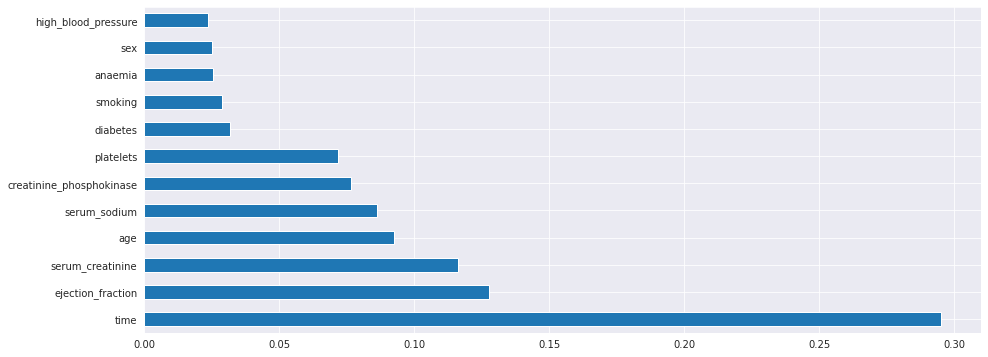

In [10]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

The above bar chart depicts the lesser correlated features having value close to 0, such as high_blood_pressure, sex, anaemia and diabetes

## Splitting data

In [11]:
x=df.drop('DEATH_EVENT',axis=1)
y=df.DEATH_EVENT

In [12]:
print(x.shape)
print(y.shape)

(299, 12)
(299,)


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

#### No feature scaling is required as Random Forest algorithm is a tree-based model

## Random Forest Algorithm

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [15]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
mylist = []
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[50  7]
 [ 9 24]]
0.8222222222222222


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        57
           1       0.77      0.73      0.75        33

    accuracy                           0.82        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.82      0.82      0.82        90

